# Explorando o sistema de equações diferenciais de Lorenz
<br>

Neste *Notebook* exploramos o sistema de equações diferenciais de Lorenz:

<br>
<br>

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

<br>
<br>

Este é um dos sistemas clássicos em equações diferenciais não lineares. Exibe uma gama de comportamentos diferentes à medida que os parâmetros (σ, β, ρ) são variados.

<br>
<br>

## Imports

<br>

Primeiro, importamos as coisas necessárias do IPython, NumPy, Matplotlib e SciPy.

In [14]:
# Imports for JupyterLite
try:
    import piplite
    await piplite.install(['ipywidgets', 'matplotlib', 'numpy', 'scipy'])
except ImportError as err:
    pass
    
%matplotlib inline

from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

## Calculando as trajetórias e *plotando* o resultado

<br>
<br>

Definimos uma função que pode integrar as equações diferenciais numericamente e então traçar as soluções. Esta função possui argumentos que controlam os parâmetros da equação diferencial (σ, β, ρ), a integração numérica (N, *max_time*) e a visualização (*angle*).

In [9]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

Vamos chamar a função uma vez para ver as soluções. Para este conjunto de parâmetros, vemos as trajetórias girando em torno de dois pontos, chamados atratores.

<br>

Usando a função interativa do IPython, podemos explorar como as trajetórias se comportam à medida que alteramos os vários parâmetros.

In [10]:
w = interactive(solve_lorenz, angle=(0.,360.), max_time=(0.1, 12.0), 
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))

display(w)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

O objeto retornado por *interactive* é um objeto *Widget* e possui atributos que contêm o resultado e os argumentos atuais:

In [11]:
t, x_t = w.result

Depois de interagir com o sistema, podemos obter o resultado e realizar mais cálculos. Nesse caso, calculamos as posições médias em x, y e z.

<br>
<br>

A criação de histogramas das posições médias (em diferentes trajetórias) mostra que, em média, as trajetórias giram em torno dos atratores.

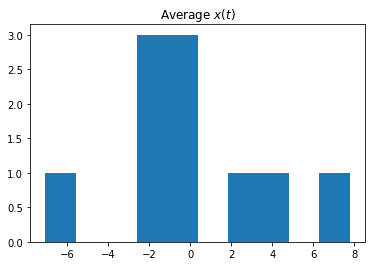

In [12]:
xyz_avg = x_t.mean(axis=1)

xyz_avg.shape

plt.hist(xyz_avg[:,1])
plt.title('Average $x(t)$');